In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank-full.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Encoding

In [6]:
catcol=df.select_dtypes(object).columns
print(catcol)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [7]:
df[catcol]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df[catcol]=oe.fit_transform(df[catcol])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0.0


<AxesSubplot:>

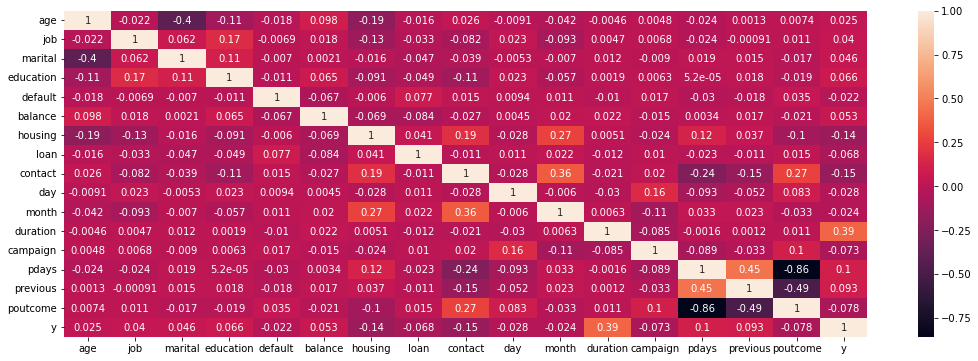

In [9]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

# Support Vector Machine without scaling

In [15]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain,ytrain)

SVC()

In [16]:
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)
print(f"Training Accuracy :- {train}\n Testing Accuracy:-{test}")

Training Accuracy :- 0.8835908616930515
 Testing Accuracy:-0.8825567679150693


# Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(xtrain)
xtests = sc.transform(xtest)

# Support Vector Machine with scaling

In [18]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrains,ytrain)

SVC()

In [19]:
train = svm.score(xtrains,ytrain)
test = svm.score(xtests,ytest)
print(f"Training Accuracy :- {train}\n Testing Accuracy:-{test}")

Training Accuracy :- 0.9072265933579802
 Testing Accuracy:-0.8984075493954585


In [20]:
from sklearn.metrics import classification_report

In [21]:
ypred = svm.predict(xtests)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     11977
         1.0       0.66      0.27      0.38      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [22]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,roc_curve
ypred = svm.predict(xtests)
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

Accuracy:- 0.8984075493954585
 ROC:- 0.6257030974985188

 [[11758   219]
 [ 1159   428]]
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     11977
         1.0       0.66      0.27      0.38      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564



# Pipe

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [24]:
pipe = Pipeline(
 steps=[
 ("scaler",StandardScaler()),
 ("svm",SVC())
 ]
 )

pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)


In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))


train = pipe.score(xtrain,ytrain)
test = pipe.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     11977
         1.0       0.66      0.27      0.38      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564

Training Accuracy:- 0.9072265933579802
 Testing Accuracy:- 0.8984075493954585


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameter = {
 "C":[0.1,1,10],
 "gamma":[0.1,0.01,0.001],
 "kernel":["rbf"]

}

In [28]:
grid = GridSearchCV(SVC(), parameter, verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.0min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.0min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.0min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.1min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 3.0min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.4min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.5min
[CV] END .....................C=0.1, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [29]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [30]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1)

In [31]:
svm =grid.best_estimator_
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

# KNN without scaling

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [34]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)
print(f"Training Accuracy :- {train}\n Testing Accuracy:-{test}")

Training Accuracy :- 0.9100704648149903
 Testing Accuracy:-0.8836626363904453


# KNN With Scaling

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrains,ytrain)

KNeighborsClassifier()

In [36]:
train = knn.score(xtrains,ytrain)
test = knn.score(xtests,ytest)
print(f"Training Accuracy :- {train}\n Testing Accuracy:-{test}")

Training Accuracy :- 0.9191708534774228
 Testing Accuracy:-0.8940578000589796


### Hyper Parameter Tuning

In [37]:
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrains,ytrain)

    train = knn.score(xtrains,ytrain)
    test = knn.score(xtests,ytest)

    print(f"{i} {train} {test} {train-test}")

1 1.0 0.8759952816278384 0.12400471837216165
2 0.9282712421398552 0.8914774402831024 0.03679380185675285
3 0.9323158593231586 0.8894868770274256 0.042828982295733065
4 0.9163269820204126 0.8916248894131524 0.024702092607260195
5 0.9191708534774228 0.8940578000589796 0.025113053418443165
6 0.9111448162543053 0.8930993807136538 0.018045435540651522
7 0.913167124845957 0.893394278973754 0.01977284587220296
8 0.9073213890732139 0.8930993807136538 0.014222008359560112
9 0.9091857048061428 0.8945738720141552 0.014611832791987633
10 0.9053622776250514 0.894426422884105 0.010935854740946382
11 0.9070370019275129 0.8945738720141552 0.01246312991335774
12 0.9046671090466711 0.8942052491890298 0.010461859857641365
13 0.9051094890510949 0.8954585667944559 0.009650922256638994
14 0.9028975890289759 0.8952373930993807 0.007660195929595215
15 0.9039087433248018 0.8956060159245061 0.008302727400295695
16 0.9025500047397857 0.8941315246240047 0.008418480115781057
17 0.9032767718899106 0.894795045709230

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(xtrains,ytrain)
ypred = knn.predict(xtests)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[11831   146]
 [ 1273   314]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11977
         1.0       0.68      0.20      0.31      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.59      0.63     13564
weighted avg       0.88      0.90      0.87     13564



In [39]:
ypredprob = knn.predict_proba(xtests)[:,1]
from sklearn.preprocessing import binarize
ypred = binarize([ypredprob], threshold=0.25)[0]
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

Accuracy:- 0.8854320259510469
 ROC:- 0.7380668545609289

 [[11144   833]
 [  721   866]]
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     11977
         1.0       0.51      0.55      0.53      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.74      0.73     13564
weighted avg       0.89      0.89      0.89     13564



# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
logreg.fit(xtrains,ytrain)

LogisticRegression()

In [42]:
train = logreg.score(xtrains,ytrain)
test = logreg.score(xtests,ytest)
print(f"Training Accuracy :- {train}\n Testing Accuracy:-{test}")

Training Accuracy :- 0.8914589060574462
 Testing Accuracy:-0.8908876437629017


In [43]:
ypred = logreg.predict(xtests) #threshold is already set at 0.25
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

Accuracy:- 0.8854320259510469
 ROC:- 0.7380668545609289

 [[11144   833]
 [  721   866]]
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     11977
         1.0       0.51      0.55      0.53      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.74      0.73     13564
weighted avg       0.89      0.89      0.89     13564

